# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

In [316]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


## 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#### 1.2.  Loading the data

In [5]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

## 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

**2.1. Exploring your data** 

In [6]:
properties.head(10)
#properties.info() #Unamed 34, 37, 47 have all null values. Unamed 0 are dates.
#properties.describe() 
#properties['Unnamed: 34']

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9
5,1995-05-01,84409.1,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,82077.1,...,44223.6,44831,45878,50369.7,56479.8,75432,64530.4,54698.8,NaN,53678.2
6,1995-06-01,94900.5,53700.3,90107.2,64252.3,74310.5,82382.8,121887,69052.5,81630.7,...,44113,45392.6,45680,50100.4,56288.9,75606.2,65511,54420.2,NaN,53735.2
7,1995-07-01,110128,52113.1,91441.2,63722.7,74127,82898.5,124028,69142.5,82352.2,...,44109.6,45535,46037.7,49860,57242.3,75984.2,65224.9,54265.9,NaN,53900.6
8,1995-08-01,112329,52232.2,92361.3,64432.6,73547,82054.4,125530,68993.4,82706.7,...,44193.7,45111.5,45922.5,49598.5,56732.4,75529.3,64851.6,54365.7,NaN,53600.3
9,1995-09-01,104473,51471.6,93273.1,64509.5,73789.5,81440.4,120597,69393.5,82011.1,...,44088.1,44837.9,45771.7,49319.7,56259.3,74940.8,64352.5,54244,NaN,53309.2


#### Observation - About the Raw Data:
After exploring the raw data I realized that there were rows that have all null values that will need to be dropped. The first row was postal codes that weren't needed in this project because postal codes are unique to boroughs. 

There are a handful of columns that have names are all uppercase. It turns out that those are not classified as boroughs. Those columns are kept throughout the cleaning, because I didn't realize that until I got to the plotted stage where I then dropped them. 

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

##### The code in the following cells should only be run a single time. To run the code again without producing logic errors the data has to be reloaded into the properties dataframe

In [7]:
properties = properties.transpose();   # It makes more sense to have the boroughs as rows

In [8]:
properties.dropna(axis=0, how='all', inplace=True);

In [9]:
properties.reset_index(inplace=True);

In [10]:
properties.columns = properties.iloc[0];   # Changing the column to the entire first row which is why I reset the index 

In [11]:
properties.drop(0, inplace=True);   # Dropping the row that is now the column index

In [12]:
properties.drop(properties.columns[1], axis=1, inplace=True);   # Dropping the postcode(NaN) column

In [13]:
properties.rename(columns={'Unnamed: 0': 'Borough'}, inplace=True);

In [14]:
properties.head(10)

,Borough,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00
1,City of London,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,756407,813770,810455,826227,776894,737275,747611,777640,844989,867841
2,Barking & Dagenham,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,297426,299421,304778,304579,306390,301283,303653,304265,304099,283139
3,Barnet,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,514668,528577,526670,525678,522639,519306,518542,519121,527747,526553
4,Bexley,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,338346,337523,333340,332920,333657,336302,334765,337760,339215,346840
5,Brent,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,73789.5,...,473849,488784,501533,494770,432188,427126,423161,467145,461398,494455
6,Bromley,81671.5,81657.6,81449.3,81124.4,81542.6,82382.8,82898.5,82054.4,81440.4,...,434257,442189,441058,439178,436080,438682,435532,435704,434625,443482
7,Camden,120933,119509,120282,120098,119929,121887,124028,125530,120597,...,890288,863171,838170,804713,825336,807124,815512,825249,870107,870627
8,Croydon,69158.2,68951.1,68712.4,68610,68844.9,69052.5,69142.5,68993.4,69393.5,...,365875,364540,365226,364413,367585,369568,371227,371357,370872,386738
9,Ealing,79885.9,80897.1,81379.9,82188.9,82077.1,81630.7,82352.2,82706.7,82011.1,...,475592,474627,473162,477369,475492,469662,466491,465614,478565,502107
10,Enfield,72514.7,73155.2,72190.4,71442.9,70630.8,71348.3,71837.5,72237.9,71725.2,...,388053,393033,386806,392721,393255,400182,390589,389901,395082,400695


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [15]:
properties = properties.melt(id_vars=['Borough'], var_name=['Year/Mon'], value_name='AvgPrice');

In [16]:
properties.head(10)

,Borough,Year/Mon,AvgPrice
0,City of London,1995-01-01,91449
1,Barking & Dagenham,1995-01-01,50460.2
2,Barnet,1995-01-01,93284.5
3,Bexley,1995-01-01,64958.1
4,Brent,1995-01-01,71306.6
5,Bromley,1995-01-01,81671.5
6,Camden,1995-01-01,120933
7,Croydon,1995-01-01,69158.2
8,Ealing,1995-01-01,79885.9
9,Enfield,1995-01-01,72514.7


#### Explanation - Why to Melt the Data:
The dataframe, prior to melting, was formatted in such a way that the column index (other than the borough column) were VALUES themselves; specifically values of dates. The point of the melt was to make it so that those "date values" were actually in the table and in the column index. 

After the melt each column in the index is the name of VARIABLE that tells us what values are represented in its column. Additionally, the AvgPrice column didn't even exist prior to the melt, without the introduction that we were provided it would be unclear what those values even are. Post melt it is explicit what the values mean.   

In [17]:
properties = properties.astype({'Borough': 'str', 'AvgPrice': 'float64'});

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [18]:
# properties['Borough'].nunique() # produces 45 values compared to the said 32

# check_group = properties.groupby('Year/Mon').count()

# check_group[(check_group['Borough'] != 45) | (check_group['AvgPrice'] != 45)] 
# All 45 data points are there for every borough and month

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [19]:
grouped_borough_data = properties.groupby('Borough').resample('A',on='Year/Mon').median()

In [20]:
borough_lst = list(properties.Borough.unique())   # Since I did the groupby I wanted a list of all the group names

#### Explanation - Why the Groupby/Median:
Because the question is how did the housing price change over the course of many years, I came to the conclusion that the montly data is too fine of a data source for the analysis. Therefore, I decided to represent the entire year by one single value via resampling. Each year is represented by the median of the average monthly price. The reason that I chose to use the median instead of the average was becuase I don't know if the monthly averages were skewed by outliers. Specifically, if a couple expensive/cheap houses entered the market for a specific borough or if there were months in a specific year were the market for a borough was booming or reeciding.

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

In [24]:
def find_ratio(borough_data):
    """ Returns the ratio of housing prices between 2020 and 1995 """
    
    ratio = borough_data.iloc[-1]/borough_data.iloc[0]
    return ratio['AvgPrice']

def find_diff(borough_data):
    """ Returns the difference of housing prices between 2020 and 1995 """
    
    diff = borough_data.iloc[-1] - borough_data.iloc[0]
    return diff['AvgPrice']

In [32]:
ratio_dct = {}
diff_dct = {}

for borough in borough_lst:
    # Populates each dictionary with the specific Borough:data key value pairs
    
    ratio = find_ratio(grouped_borough_data.loc[borough])
    ratio_dct[borough] = ratio
    
    diff = find_diff(grouped_borough_data.loc[borough])
    diff_dct[borough] = diff
        
borough_stats = pd.DataFrame([ratio_dct,diff_dct])
borough_stats = borough_stats.T.rename(columns={0: 'Ratio', 1: 'Diff'}).sort_values(by='Ratio', ascending=True)

# Removing indexes that aren't boroughs. These are the 13 'boroughs' that increase the value from the known 32 to unusual 45
borough_stats.drop(labels=['NORTH EAST','NORTH WEST','WEST MIDLANDS','EAST MIDLANDS',
                            'SOUTH WEST', 'SOUTH EAST', 'EAST OF ENGLAND', 'Outer London', 'Inner London', 
                            'England', 'LONDON','YORKS & THE HUMBER', 'City of London'], inplace = True) 

In [26]:
borough_stats.head(10)

,Ratio,Diff
Bexley,5.262343,274164.922175
Havering,5.316514,295679.323090
Bromley,5.327570,353851.621905
Sutton,5.347053,305010.809130
Croydon,5.385498,302348.771520
Enfield,5.449304,320746.535985
Harrow,5.453237,372234.656790
Hillingdon,5.504617,332789.730800
Hounslow,5.619817,337073.004380
Barnet,5.692638,430992.486385


In [29]:
# Each borough is part of a region and I plan on using this fact to do some extra analysis.
central = ['Camden','Kensington & Chelsea','Islington','Lambeth','Southwark','Westminster']
east = ['Barking & Dagenham', 'Bexley','Greenwich','Hackney','Havering','Lewisham','Newham',
        'Redbridge','Tower Hamlets','Waltham Forest']
north = ['Barnet', 'Enfield', 'Haringey']
south = ['Bromley', 'Croydon', 'Kingston upon Thames', 'Merton', 'Sutton', 'Wandsworth']
west = ['Brent', 'Ealing', 'Hammersmith & Fulham', 'Harrow', 'Richmond upon Thames', 'Hillingdon', 'Hounslow']


In [33]:
# This is the problem that that this block of code is trying to solve:
# I wanted to add the specific region that each borough is in to a new column in the borough_stats df
# based on the lists of regions that are above

def get_region(name, region, df):
    """ Parameters:
            name (string): name of the region
            region (list): list of the boroughs that are in the region
            df (DataFrame): an entire df that contain columns named 'index' and 'Region' 
        
        Returns:
            DataFrame: the same df with the 'Region' column partial populated
            
    """
    
    for idx, row in df.iterrows():
        if row['index'] in region: 
            df.loc[idx,'Region'] = name
   
    return df

borough_stats.reset_index(inplace=True) # Reset the index so that I can use my custom function
borough_stats['Region'] = None

borough_stats = get_region('central', central, borough_stats)
borough_stats = get_region('east', east, borough_stats)
borough_stats = get_region('north', north, borough_stats)
borough_stats = get_region('south', south, borough_stats)
borough_stats = get_region('west', west, borough_stats)

borough_stats.set_index('index', inplace=True)

In [34]:
borough_stats.head(10)

,Ratio,Diff,Region
index,,,
Bexley,5.262343,274164.922175,east
Havering,5.316514,295679.323090,east
Bromley,5.327570,353851.621905,south
Sutton,5.347053,305010.809130,south
Croydon,5.385498,302348.771520,south
Enfield,5.449304,320746.535985,north
Harrow,5.453237,372234.656790,west
Hillingdon,5.504617,332789.730800,west
Hounslow,5.619817,337073.004380,west


**Visualing the Data 3.1**

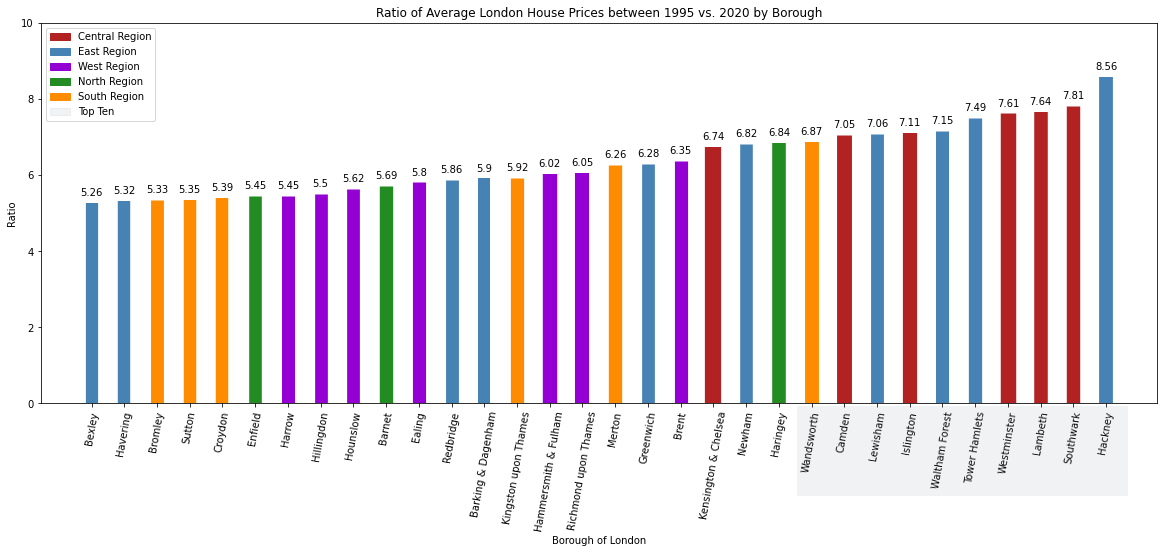

In [35]:
colors = {'central':'firebrick' , 'east':'steelblue' , 'west':'darkviolet', 
          'north':'forestgreen' , 'south':'darkorange'}

fig, ax = plt.subplots(figsize = (20,7), facecolor='white', edgecolor='white')
ax.vlines(x=borough_stats.index, ymin=0, ymax=borough_stats['Ratio'], 
          color=borough_stats['Region'].apply(lambda x: colors[x]), linewidth=borough_stats['Diff'].apply(lambda x: x**0.2))

for idx, borough in enumerate(borough_stats['Ratio']):
    plt.text(idx, borough+0.2, round(borough,2), horizontalalignment = 'center', fontdict={'size':10})
    
ax.set_title('Ratio of Average London House Prices between 1995 vs. 2020 by Borough')
ax.set(xlabel = 'Borough of London', ylabel='Ratio', ylim=(0,10))
plt.xticks(borough_stats.index, rotation=80, horizontalalignment='center')

central_patch = patches.Patch(color='firebrick', label= 'Central Region')
east_patch = patches.Patch(color='steelblue', label= 'East Region')
west_patch = patches.Patch(color='darkviolet', label= 'West Region')
north_patch = patches.Patch(color='forestgreen', label= 'North Region')
south_patch = patches.Patch(color='darkorange', label= 'South Region')
top_ten = patches.Patch(color='lightslategray', label= 'Top Ten', alpha=0.1)

plt.legend(handles=[central_patch, east_patch, west_patch, north_patch, south_patch, top_ten], loc=2)
p1 = patches.Rectangle((.65, -0.06), width=.23, height=.18, alpha=0.1,facecolor='lightslategray', transform=fig.transFigure)
fig.add_artist(p1);


### 4. Conclusion
The borough whose average housing increased the most from 1995 to 2020 was Hackney, growing from 66k to 569k. However, Hackney doesn't currently have the most expensive housing. The most expensive borough is Kensington & Chelsea with an average home price of 1.36M.

Zooming out to the regional level, the region that experienced the greatest amount of increase in housing prices was the central region. Five out of the six boroughs that are in the central region are in the the top ten boroughs that had the greatest increase in housing. 

### 5. Reflection

1 - Things always take longer than you think they are going to take

2 - I realized that data science and the projects associated with the are very similar to doing and presenting math problems. 
    Doing it is extrememly messy and you are jumping back and forth over and over again, but you present it "perfectly" and it       gives the false impression that it was done that way. When looking at other people's projects I was under that impression       and always felt intimidated by them. 
    
3 - One of the major challenges that I had was that I felt like I was reacting instead of anticipating. What I mean by this is       that for the most part I was unsure about the results of my actions. It felt like I was solving problems that I was             creating. I guess what I am trying to say is that although I got to a solution, was the path that I took the most               efficient?

Extension 1 - Change the bar plot to a bubble graph that also uses the price of houses in 2020 as the size argument

Extension 2 - A line visualization of the change in ratios each year or every five years for each borough